# Introduction of mglearn for supervised learning

## Installation

```bash
pip install mglearn
```

## Brief introduction

- mglearn 是在利用 python 进行机器学习相关分析的库
- 相比 sklearn ，mglearn 并不是十分常见，但却经常可以与 sklearn 同时使用
- mglearn 的相关介绍文档并不多，笔者认为 mglearn 主要的优势是其包含一些可用于机器学习的数据集以及其将机器学习的结果可视化展示
- 本文将以机器学习中 **监督学习** 的例子来直观感受 mglearn 的操作，并借着对 mglearn 的使用，重温机器学习的内容

## Before we start

### Import module
- 需要先导入一些常用的模块，没有安装的可以通过 `pip` 命令来安装

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import mglearn
from sklearn.model_selection import train_test_split

- 忽略 Warnings

In [3]:
import warnings
warnings.filterwarnings("ignore", category=Warning)
# warnings.filterwarnings('ignore', category=DeprecationWarning)

### Conception machine learning
- 了解模型复杂度，泛化能力（学习一个能够在前所未见的新数据上表现良好的模型）
    - 如果一个模型能够对没见过的数据做出准确预测，我们就说它能够从训练集 **泛化（generalize）** 到测试集
- 欠拟合和过拟合的概念
    - 构建一个过于简单的模型，无法刻画训练数据的所有变化，称为 **欠拟合（underfitting）**
    - 构建一个对现有信息量来说过于复杂的模型，被称为 **过拟合（overfitting）**，在训练集上表现很好、但不能泛化到新数据上的模型，那么就存在过拟合
- 模型复杂度
    - 模型越复杂，在训练数据上的预测结果就越好
    - 模型过于复杂，我们开始过多关注训练集中每个单独的数据点，模型就不能很好地泛化到新数据上
    - 二者存在一个最佳位置，可以得到最好地泛化性能，这就是我们想要的模型
- 数据量
    - 收集更多数据，适当构建更复杂的模型，对监督学习任务往往特别有用
    - 在现实世界中，收集多少数据是可以人为掌握的，这可能比模型调参更为有效
    - 永远不要低估更多数据的力量

![model_complexity](images/overfitting_underfitting_cartoon.png)

### What we discuss in this article

- 本次主要讨论用于分类和回归的机器学习模型，各个模型的优点和缺点，以及如何控制它们的模型复杂度
    - 对于许多算法而言，设置正确的参数对模型性能至关重要
    - 有些算法还对输入数据的表示方式很敏感，特别是特征的缩放
    - 如果盲目地将一个算法应用于数据集，而不去理解模型所做的假设以及参数设定的含义，不太可能会得到精度高的模型
- 对于提到的有关模型的某些知识（以及在特定情况下使用那些模型）对于在实践中成功应用机器学习模型是很重要的

## Supervised learning example

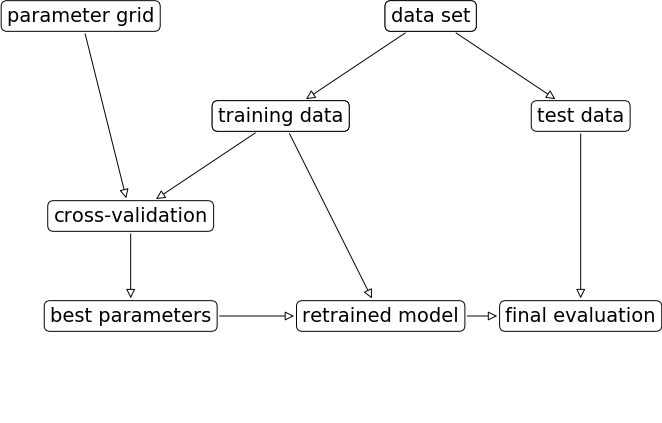

In [4]:
mglearn.plots.plot_grid_search_overview()

###  Some sample datasets

X.shape: (26, 2)


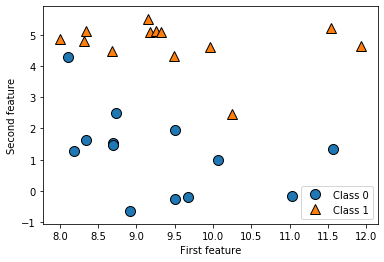

In [5]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

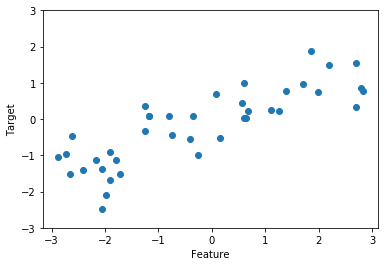

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [9]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [10]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


In [12]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


### k-Nearest neighbor
- 适用于小型数据集，是很好的基准模型，也适用于高维数据
- 缺点是预测速度慢且不能处理具有很多特征的数据集，所以实践中往往不会用到

#### k-Neighbors classification

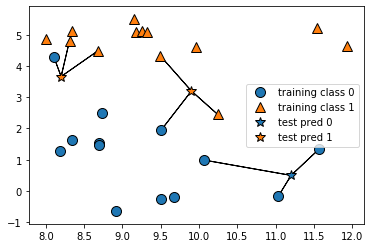

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
print("Test set predictions:", clf.predict(X_test))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


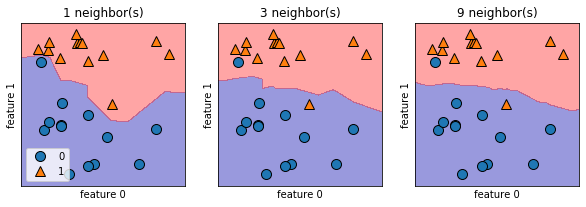

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

#### k-Neighbors regression

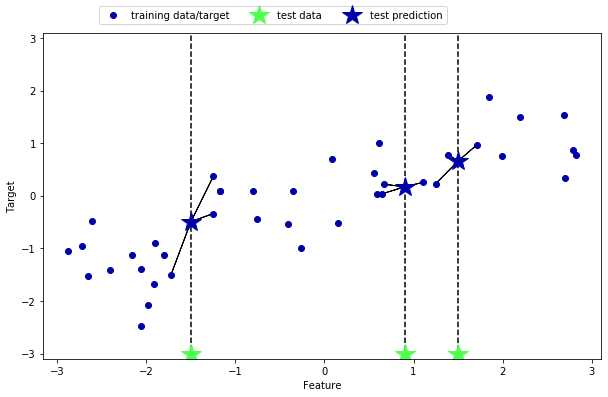

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [18]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [19]:
print("Test set predictions:\n", reg.predict(X_test))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


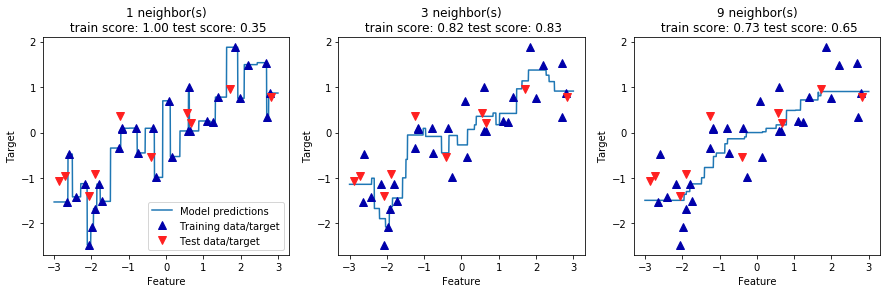

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

#### Parameters

更少的邻居对应更高的模型复杂度，使用更多的邻居对应更低的模型复杂度

### Linear models
非常可靠的首选算法，适用于非常大的数据集，也适用于高维数据

#### Linear models for regression

w[0]: 0.393906  b: -0.031804


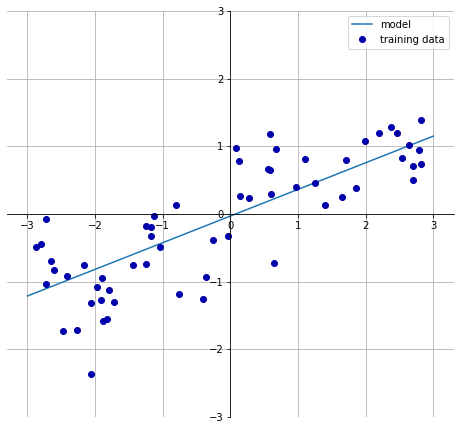

In [21]:
mglearn.plots.plot_linear_regression_wave()

#### Linear regression aka ordinary least squares

In [22]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [23]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [24]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [25]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [26]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


##### Ridge regression

岭回归用到 L2 正则化，要设置 alpha 参数
- 增大 alpha 会使线性模型的系数更加趋向于 0 ，从而降低训练集性能，但可能会提高泛化性能
- 减小 alpha 可以让系数受到的限制更小

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [28]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [29]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


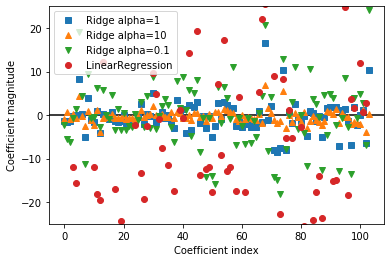

In [30]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

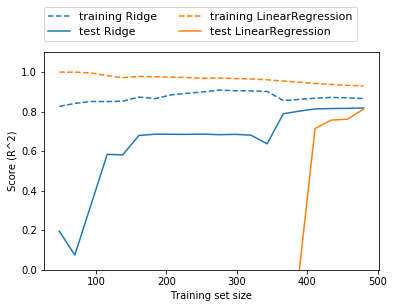

In [31]:
mglearn.plots.plot_ridge_n_samples()

##### Lasso

- lasso 是另外一种正则化的线性回归
    - 与岭回归相同，使用 lasso 也是约束系数使其接近于 0，但用到的方法不同，叫做 L1 正则化
    - L1 正则化的结果是，使用 lasso 时某些系数刚好为 0
- lasso 有一个正则化参数 alpha，可以控制系数趋向于 0 的强度
- 还需要增加 max_iter 的值（运行迭代的最大次数）
    - alpha 变小，我们可以拟合一个更复杂的模型
    - 但如果把 alpha 设得太小，那么就会消除正则化的效果，并出现过拟合，得到与 LinearRegression 类似的结果
- 在实践中，两个模型中一般首选岭回归
    - 但如果特征很多，你认为只有其中几个是重要的，那么选择 Lasso 可能更好
    - 同样，如果你想要一个容易解释的模型，Lasso 可以给出更容易理解的模型，因为它只选择了一部分输入特征
- scikit-learn 还提供了 ElasticNet 类，结合了 Lasso 和 Ridge 的惩罚项
    - 在实践中，这种结合的效果最好
    - 代价是要调节两个参数：一个用于 L1 正则化，一个用于 L2 正则化

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [33]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [34]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

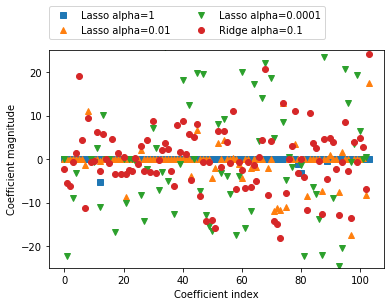

In [35]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

##### Linear models for classification

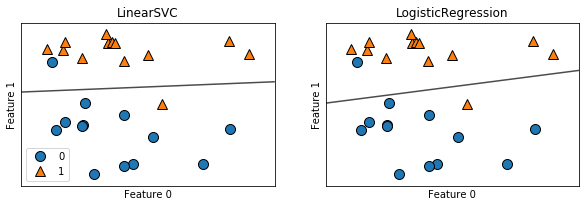

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

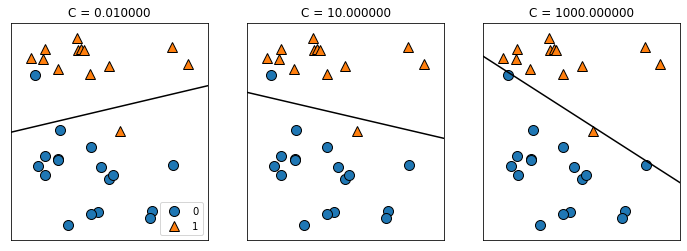

In [37]:
mglearn.plots.plot_linear_svc_regularization()

- 两个模型都默认使用L2正则化，决定正则化强度的权衡参数叫做 C
    - C 值越大，对应正则化越弱，即如果参数 C 值越大，那么 LogisticRegression 和 LinearSVC 将尽可能将训练集拟合到最好
    - 而如果 C 值较小，那么模型更强调使系数向量（w）接近于 0
- 参数 C 的作用还有另一个有趣之处
    - 较小的 C 值可以让算法尽量适应“大多数”数据点
    - 而较大的 C 值更强调每个数据点都分类正确的重要性

In [38]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [39]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [40]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


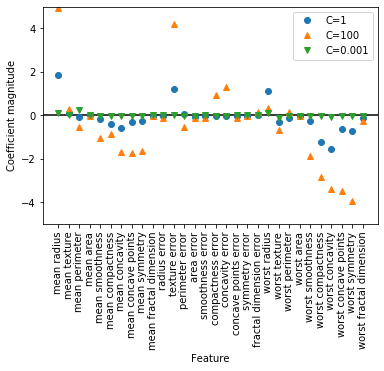

In [41]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


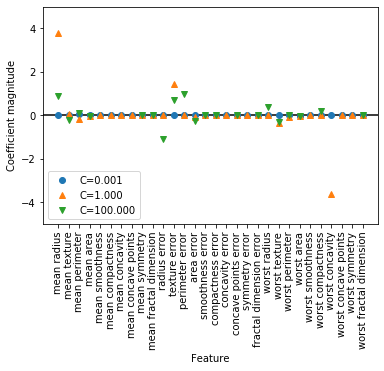

In [42]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

- 如果想要一个可解释性更强的模型，使用 L1 正则化可能更好，因为它约束模型只使用少数的几个特征，上图是使用 L1 正则化的系数图像和分类精度
- 用于二分类的线性模型与用于回归的线性模型有许多相似之处
- 模型的主要差别在于 penalty 参数，这个参数会影响正则化，也会影响模型是使用所有可用特征还是只选择特征的一个子集

##### Linear models for multiclass classification

- 将二分类算法推广到多分类算法的一种常见方法是“一对其余”（one-vs.-rest）方法
- 在“一对其余”方法中，对每个类别都学习一个二分类模型，将这个类别与所有其他类别尽量分开，这样就生成了与类别个数一样多的二分类模型
- 在测试点上运行所有二分类器来进行预测
- 在对应类别上分数最高的分类器“胜出”，将这个类别标签返回作为预测结果

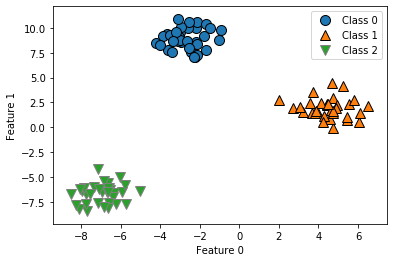

In [43]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [44]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


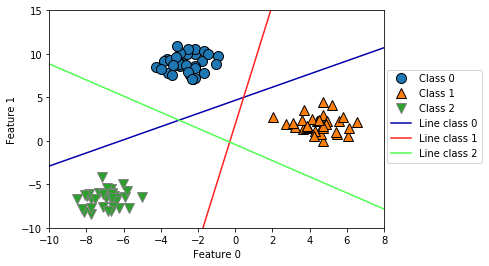

In [45]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

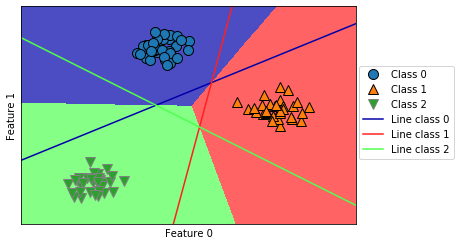

In [46]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Strengths, weaknesses and parameters

- 线性模型的主要参数是正则化参数，在回归模型中叫做 alpha，在 LinearSVC 和 LogisticRegression 中叫做 C
    - alpha值较大或C值较小，说明模型比较简单。特别是对于回归模型而言，调节这些参数非常重要
    - 通常在对数尺度上对 C 和 alpha 进行搜索
- 你还需要确定的是用 L1 正则化还是 L2 正则化
    - 如果你假定只有几个特征是真正重要的，那么你应该用 L1 正则化，否则应默认使用 L2 正则化
    - 如果模型的可解释性是很重要的话，使用 L1 也会有帮助
    - 由于L1只用到几个特征，所以更容易解释哪些特征对模型是重要的，以及这些特征的作用
- 线性模型的训练速度非常快，预测速度也很快，这种模型可以推广到非常大的数据集，对稀疏数据也很有效
    - 如果数据包包含数十万甚至上百万个样本，可能需要研究如何使用 LogisticRegression 和 Ridge 模型的 `solver=‘sag’` 选项，在处理大型数据时，这一选项比默认值要更快
    - 其它选项还有 SGDClassifier 和 SGDRegressor 类，它们对线性模型实现了可扩展性更强的版本
- 线性模型的另一个优点在于，利用我们之间见过的用于回归和分类的公式，理解如何进行预测是相对比较容易的
- 不幸的是，往往并不完全清楚系数为什么是这样的,如果数据集中包含高度相关的特性，这一问题尤为突出,可能很难对系数做出解释
- 如果特征数量大于样本数量，线性模型的表现通常都很好
    - 常用于非常大的数据集，只是因为训练其他模型并不可行
    - 但在更低维的空间中，其他模型的泛化性能可能更好

### Decision trees

速度很快，不需要数据缩放，可以可视化，很容易解释

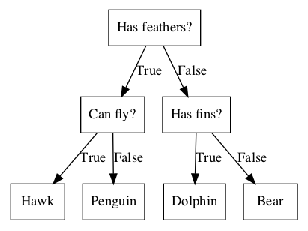

In [47]:
mglearn.plots.plot_animal_tree()

#### Building decision trees

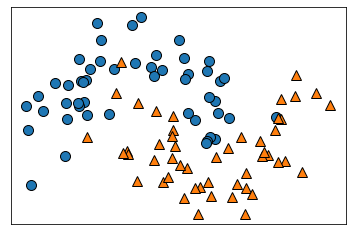

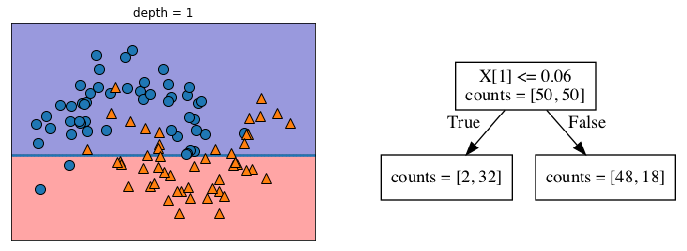

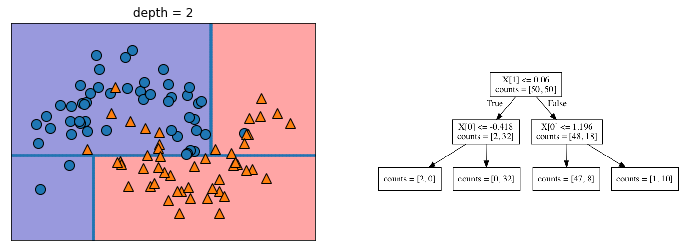

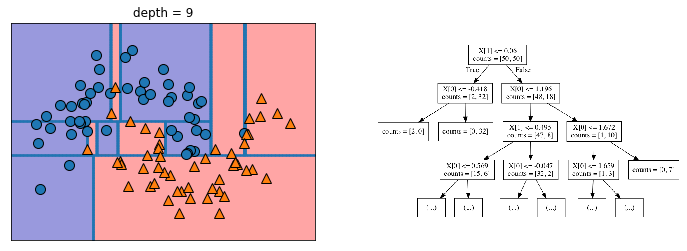

In [48]:
mglearn.plots.plot_tree_progressive()

#### Controlling complexity of decision trees

In [49]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [50]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Analyzing Decision Trees

In [51]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

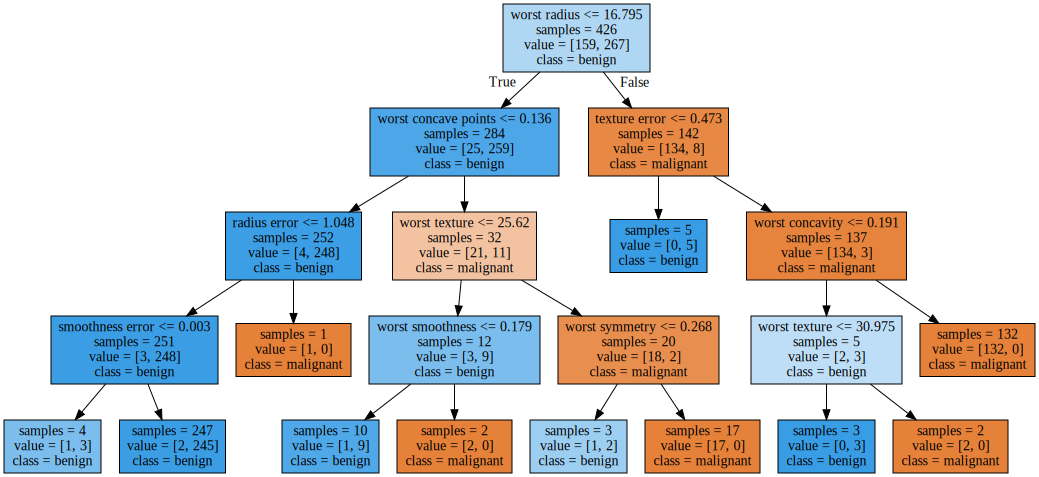

In [52]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature Importance in trees

In [53]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


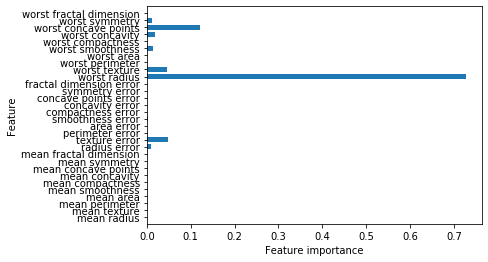

In [54]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

- 上图是树的特征重要性，它为每个特征对树的决策的重要性进行排序
- 对于每个重要性来说，它都是一个介于 0 和 1 之间的数字
    - 0 表示“根本没用到”
    - 1 表示“完美预测目标值”
- 特征重要性的求和始终为1
- 如果某个特征的 feature_importance_ 很小，并不能说明这个特征没有提供任何信息，这只能说明该特征没有被树选中，可能是因为另一个特征也包含了同样的信息

Feature importances: [0. 1.]


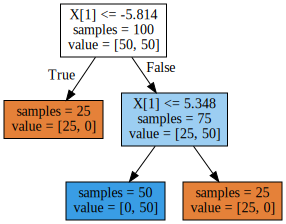

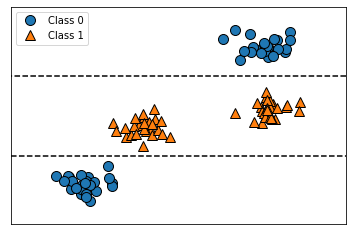

In [55]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

#### Strengths, weaknesses and parameters

- 控制决策树模型复杂度的参数是预剪枝参数，它在树完全展开之前停止树的构造
- 通常来说，选择一种预剪枝策略（设置 `max_depth` 、`max_leaf_nodes` 或 `min_samples_leaf`）足以防止过拟合
- 与前面讨论过的许多算法相比，决策树有两个优点
    - 得到的模型很容易可视化，非专家也容易理解（至少对于较小的树而言）
    - 算法完全不受数据缩放的影响
        - 由于每个特征被单独处理，而且数据的划分也不依赖于缩放，因此决策树算法不需要特征预处理，比如归一化或标准化
        - 特别是特征的尺度完全不一样时或者二元特征和连续特征存在时，决策树的效果很好
- 决策树的主要缺点在于，即使做了预剪枝，它也经常会过拟合，泛化性能很差，因此，大多数应用中，往往使用决策树集成的方法来代替单颗决策树

### Random forests

几乎总是比单颗决策树的表现要好
- 鲁棒性很好，非常强大
- 不需要数据缩放
- 不适用于高维稀疏数据

#### Analyzing random forests

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

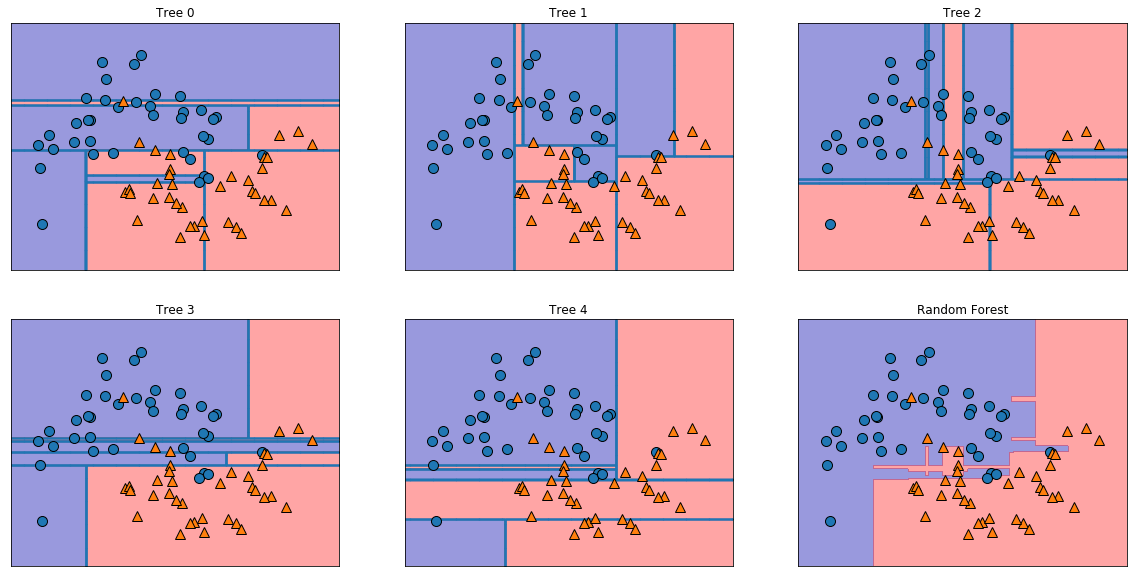

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


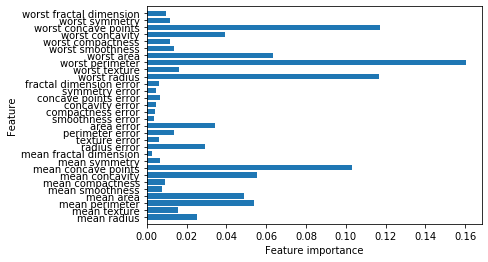

In [59]:
plot_feature_importances_cancer(forest)

#### Strengths, weaknesses, and parameters

- 用于回归和分类的随机森林是目前应用最广泛的机器学习方法之一
    - 通常不需要反复调节参数就可以给出很好的结果
    - 也不需要对数据进行缩放
- 需要调节的重要参数有 `n_estimators` 和 `max_features` ，可能还包括预剪枝选项（如 `max_depth`）
    - `n_estimators` 总是越大越好。常用的经验法则是“在你的时间/内存允许的情况下尽量多”
    - `max_features` 决定每棵树随机性大小，较小的 `max_features` 可以降低过拟合，好的经验是使用默认值
        - 对于分类，默认值是 `max_features=sqrt(n_features)`
        - 对于回归，默认值是 `max_features=n_features`
    - 增大 `max_features` 或 `max_depth` 有时也可以提高性能，它还可以大大降低用于训练和预测时间和空间要求

### Gradient Boosted Regression Trees (Gradient Boosting Machines)

- 精度通常比随机森林略高
- 与随机森林相比，训练速度更慢，但预测速度更快，需要的内存也更少
- 比随机森林需要更多的参数调节
- 通常也不适用于高维稀疏矩阵

#### Analyzing Gradient Boosted Regression Trees

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [61]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [62]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


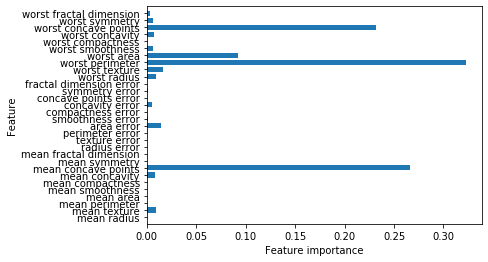

In [63]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

#### Strengths, weaknesses and parameters

- 梯度提升树模型的主要参数包括树的数量 `n_estimators` 和学习率 `learningrate`
    - 后者用于控制每棵树对前一棵树的错误的纠正强度
    - 这两个参数高度相关，因为 `learning_rate` 越低，就需要更多的树来构建具有相似复杂度的模型
    - 随机森林的 `n_estimators` 值总是越大越好
    - 但梯度不同，增大 `n_estimators` 会导致模型更加复杂，进而可能导致过拟合
    - 通常的做法是根据时间和内存的预算选择合适的 `n_estimators`，然后对不同的 `learning_rate` 进行遍历
- 另一个重要参数是 `max_depth`（或 `max_leaf_nodes`），用于降低每棵树的复杂度
    - 梯度提升模型的 `max_depth` 通常都设置得很小，一般不超过5

### Kernelized Support Vector Machines

- 对于特征含义相似的中等大小的数据集很强大
- 需要数据缩放
- 对参数敏感

#### Understanding SVMs

- 在训练过程中，SVM 学习每个训练数据点对于表示两个类别之间的决策边界的重要性
- 通常只有一部分训练数据点对于定义决策边界来说很重要
    - 位于类别之间边界上的那些点
    - 这些点叫做支持向量（support vector），支持向量机正是由此得名
- 想要对新样本点进行预测，需要测量它与每个支持向量之间的距离
- 分类决策是基于它与支持向量之间的距离以及在训练过程中学到的支持向量的重要性（保存在 SVC 的 `sual_coef_` 属性中）来做出的

Text(0, 0.5, 'Feature 1')

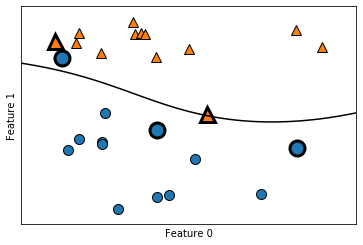

In [64]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Tuning SVM parameters

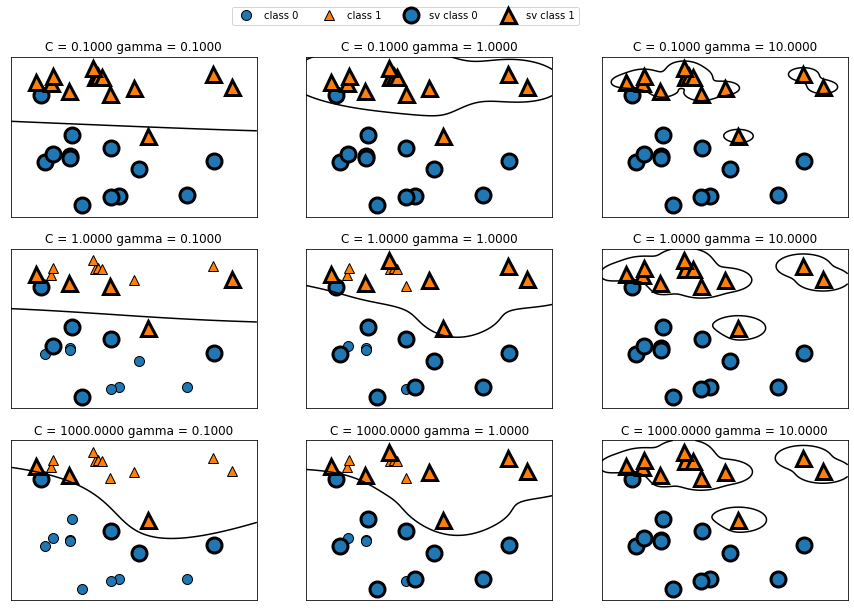

In [65]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


#### Strengths, weaknesses and parameters

- 在例子中，SVM 给出了非常平滑且非线性的（不是直线）的边界，这里调节了两个参数, `C` 和 `gamma`
    - `gamma` 参数用于控制高斯核的宽度，它决定了点与点之间“靠近”是指多远的距离
    - `C` 参数是正则化参数，与线性模型中用到的类似，它限制每个点的重要性（或者确切地说，每个点的 `dual_coef_`）
- 从左到右，我们将参数 `gamma` 的值从 0.1 增加到 10
    - `gamma` 较小，说明高斯核的半径较大，许多点都被看做比较靠近
    - 这一点可以在图中看出，左侧的图决策边界非常平滑，越向右的图决策边界更关注单个点
    - 小的 `gamma` 值表示决策边界变化很慢，生成的是复杂度较低的模型，而大的 `gamma` 值则会生成更为复杂的模型。
- 从上到下，我们将参数 `C` 的值从 0.1 增加到 1000
    - 与线性模型相同，`C` 值很小，说明模型非常受限，每个数据点的影响范围都有限
    - 左上角的图中，决策边界看起来几乎是线性的，误分类的点对边界几乎没有任何影响
    - 左下角的图，增大 `C` 之后这些点对模型的影响变大，使得决策边界发生弯曲来将这些点正确分类
- 在所有特征的测量单位相似（比如都是像素密度）而且范围也差不多时，SVM 是值得尝试的

### Neural Networks

- 可以构建非常复杂的模型，特别是对于大型数据集而言
- 对数据缩放敏感，对参数选取敏感
- 大型网络需要很长的训练时间

#### The Neural Network Model

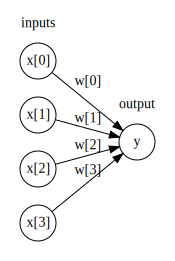

In [67]:
display(mglearn.plots.plot_logistic_regression_graph())

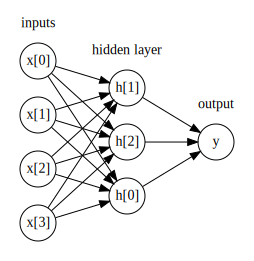

In [68]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

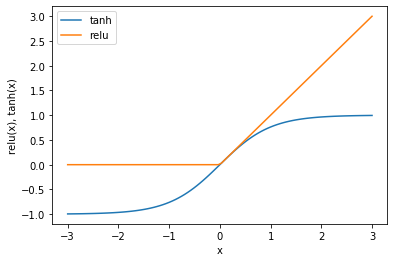

In [69]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

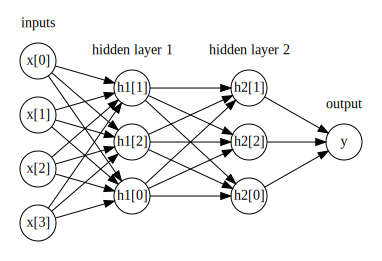

In [70]:
mglearn.plots.plot_two_hidden_layer_graph()

#### Tuning Neural Networks

- 默认配置

Text(0, 0.5, 'Feature 1')

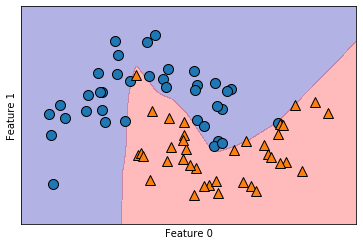

In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 单隐藏层，神经元个数为 10

Text(0, 0.5, 'Feature 1')

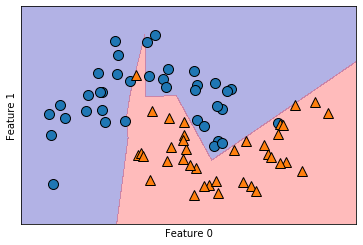

In [72]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 包含 2 个隐层，每个隐层包含 10 个隐单元的神经网络学到的决策边界（激活函数为 relu）

Text(0, 0.5, 'Feature 1')

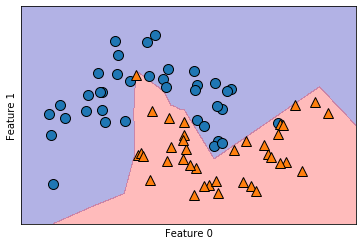

In [73]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 包含 2 个隐层，每个隐层包含 10 个隐单元的神经网络学到的决策边界（激活函数 tanh）

Text(0, 0.5, 'Feature 1')

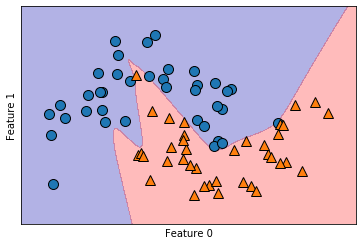

In [74]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 不同隐单元个数与 alpha 参数的不同设定下的决策函数

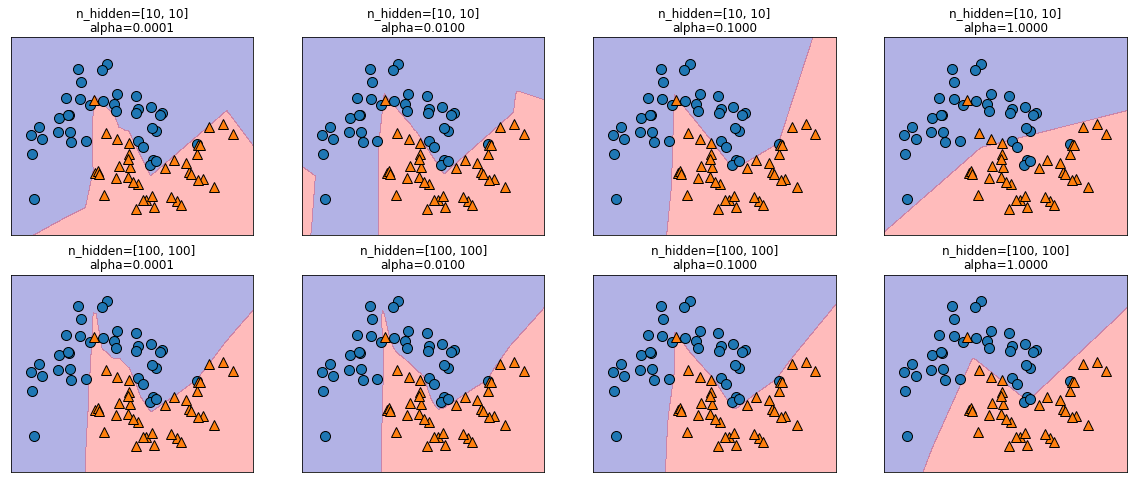

In [75]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

- 相同参数，但不同随机初始化的情况下学到的决策函数

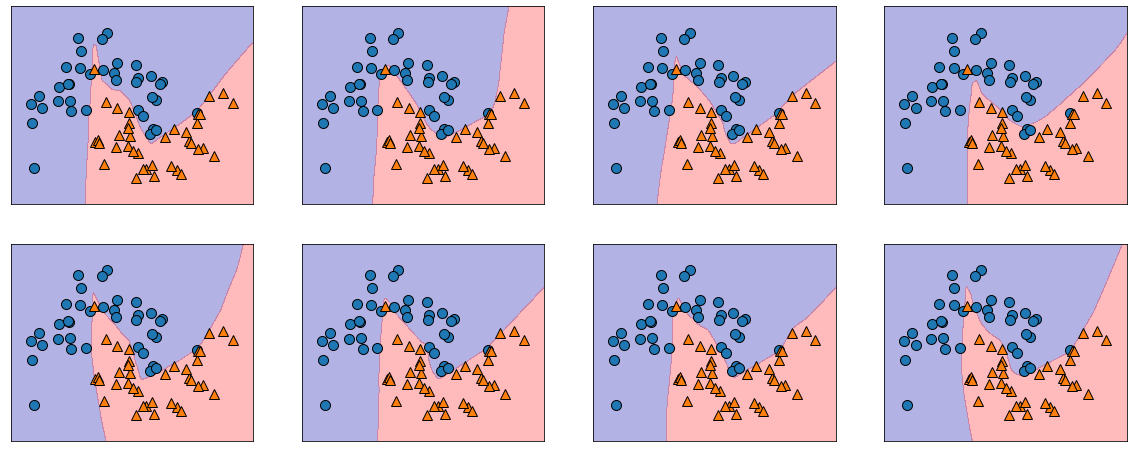

In [76]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

#### Test on Cancer Dataset

In [77]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [79]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


In [80]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [81]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


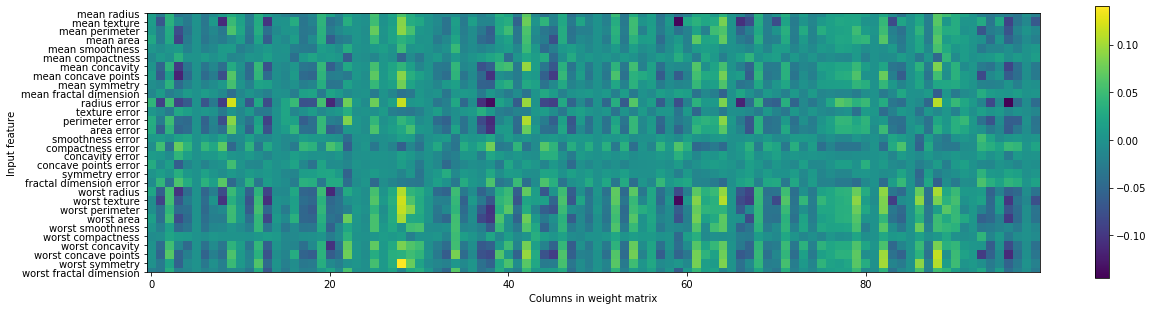

In [82]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### Strengths, weaknesses and parameters

- 控制神经网络复杂度的方法有很多种
    - 隐层的个数
    - 每个隐层中的单元个数
    - 正则化（alpha）
- 神经网络的一个重要性质是，在开始学习之前其权重是随机设置的，这种随机初始化会影响学到的模型（即使使用完全相同的参数）
- MLP 的精度相当好，但没有其他模型好
    - 由于数据的缩放。神经网络也要求所有输入特征的变化范围相似（与较早的 SVC 例子相同）
    - 最理想的情况是均值为 0、方差为 1
- 神经网络调参的常用方法是
    - 首先创建一个达到足以过拟合的网络，确保这个网络可以对任务进行学习
    - 确保训练数据可以被学习之后，要么缩小网络，要么增大 alpha 来增强正则化，以提高泛化性能
- 由 `solver` 参数设定如何学习模型或用来学习参数的算法 `solver` 有两个好用的选项
    - 默认选项是 `adam`，在大多数情况下效果都很好，但对数据的缩放相当敏感（始终将数据缩放为均值为 0、方差为 1 是很重要的）
    - 另一个选项是 `lbfgs`，其鲁棒性相当好，但在大型模型或大型数据集上的时间会比较长
    - 更高级的 `sgd` 选项，许多深度学习研究人员都会用到
    - 在开始使用 MLP 时，建议使用 `adam` 和 `lbfgs`

### Uncertainty estimates from classifiers

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### The Decision Function

In [84]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
Decision function shape: (25,)


In [85]:
# show the first few entries of decision_function
print("Decision function:", gbrt.decision_function(X_test)[:6])

Decision function: [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [86]:
print("Thresholded decision function:\n",
      gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [87]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:",
      np.all(pred == gbrt.predict(X_test)))

pred is equal to predictions: True


In [88]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


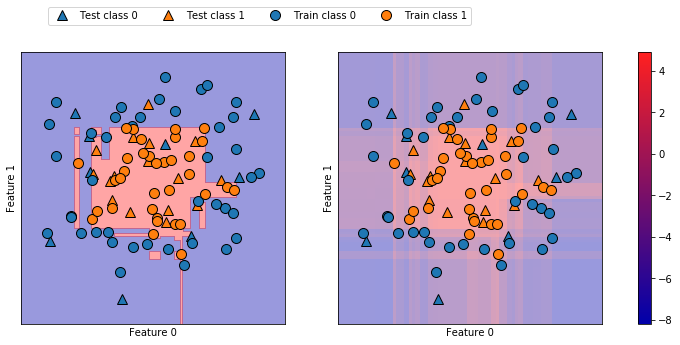

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

决策函数的值表示模型对该数据点属于“正”类的置信程度
- 正值表示对正类的偏好
- 负值表示对“反类”（其他类）的偏好

#### Predicting Probabilities

In [90]:
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)

Shape of probabilities: (25, 2)


In [91]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


- 每行的第一个元素是第一个类别的估计概率，第二个元素是第二个类别的估计概率
- 由于 `predict_proba` 的输出是一个概率，因此总是在 0 和 1 之间，两个类别的元素之和始终为 1

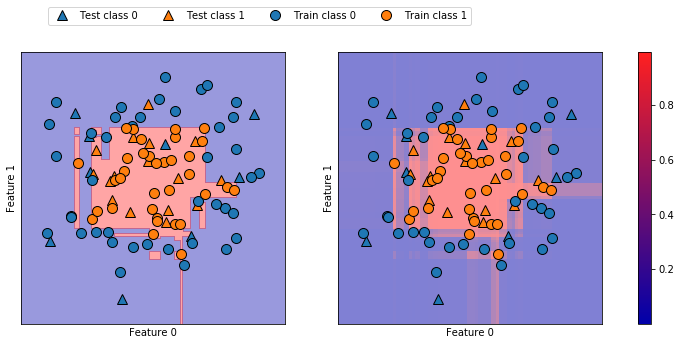

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

![classifier_comparison](images/classifier_comparison.png)

## Summary

- 面对新数据集，通常最好先从简单模型开始，比如线性模型、朴素贝叶斯或最近邻分类器，看能得到什么样的结果
- 对数据有了进一步了解之后，可以再考虑用于构建更复杂模型的算法，比如随机森林、梯度提升决策树、SVM 或神经网络
- 虽然我们分析了不同的参数设定对算法的影响，但在生产环境中实际构建一个对新数据泛化性能很好的模型要更复杂一些，有机会在后续的研究中介绍正确调参的方法和自动寻找最佳参数的方法